In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
plt.rcParams['figure.figsize']=(16,5)
#plt.style.available
plt.style.use('fivethirtyeight')


In [39]:
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('med-insurance.csv')
print(data.shape)
data.columns


(1338, 7)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

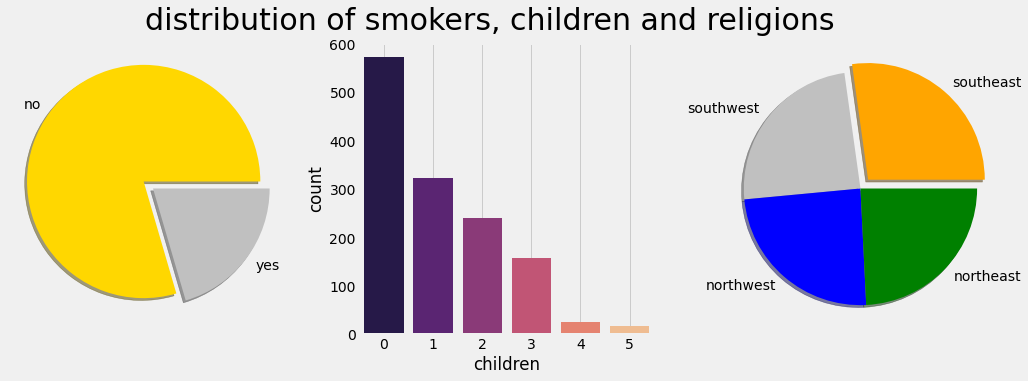

In [40]:
plt.suptitle('distribution of smokers, children and religions', fontsize=30)

plt.subplot(1,3,1)
plt.pie(data['smoker'].value_counts().values,
       labels=data['smoker'].value_counts().index,
       colors=['gold','silver'],
       startangle=0,
       shadow=True,
       explode=[0.1,0])

plt.subplot(1,3,2)
sns.countplot(data['children'],palette='magma')
plt.grid()

plt.subplot(1,3,3)
plt.pie(data['region'].value_counts().values,
       labels=data['region'].value_counts().index,
       colors=['orange','silver','blue','green'],
       startangle=0,
       shadow=True,
       explode=[0.1,0,0,0])

plt.show()


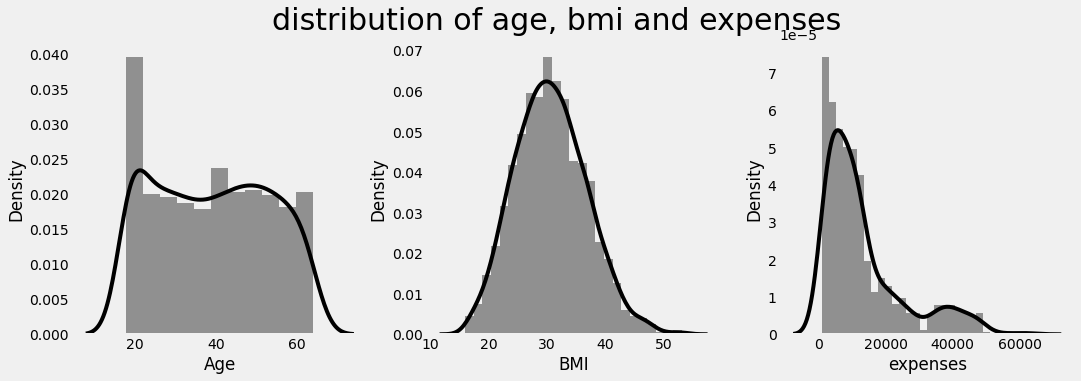

In [41]:
plt.suptitle('distribution of age, bmi and expenses', fontsize=30)


data2=pd.read_csv('med-insurance.csv')

plt.subplot(1,3,1)
sns.distplot(data['age'],color='black')
plt.xlabel('Age')
plt.grid()

plt.subplot(1,3,2)
sns.distplot(data['bmi'],color='black')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1,3,3)
#sns.histplot(data = data2, x = "expenses",kde=True)
sns.distplot(data['expenses'],color='black')
plt.xlabel('expenses')
plt.grid()

In [42]:

px.scatter(data,y='expenses',
          x='age',
          marginal_y = 'violin',
          trendline='ols')


In [43]:

px.scatter(data,y='expenses',
          x='bmi',
          marginal_y = 'violin',
          trendline='ols')

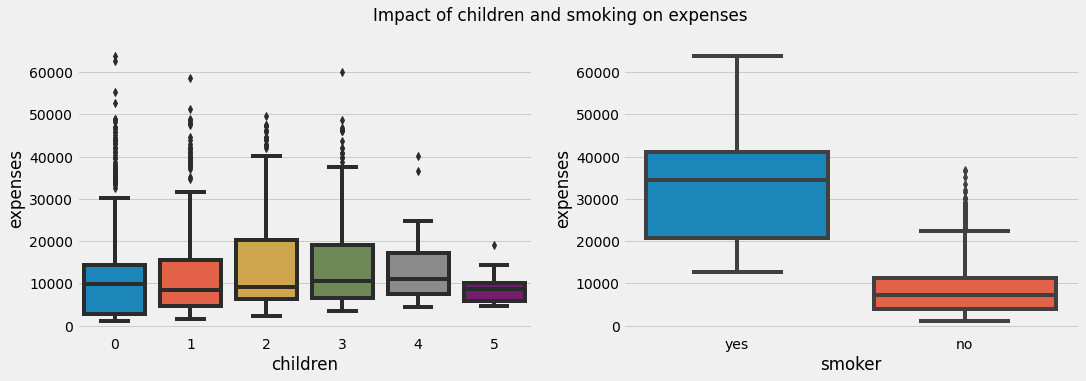

In [44]:
plt.subplot(1,2,1)
sns.boxplot(data['children'],data['expenses'])
plt.subplot(1,2,2)
sns.boxplot(data['smoker'],data['expenses'])
plt.suptitle('Impact of children and smoking on expenses')
plt.show()

In [45]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [46]:
#data encoding
data['sex']=data['sex'].replace(('male','female'),(2,1))
data['smoker']=data['smoker'].replace(('yes','no'),(2,1))
data['region']=data['region'].replace(('southeast','southwest','northeast','northwest'),(2,1,1,1))
data.head()

#data.select_dtypes('object').columns

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [47]:
y=data['expenses']
x=data.drop(['expenses'],axis=1)
print(y.shape)
print(x.shape)
print(x.columns)

(1338,)
(1338, 6)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [48]:
#splitting data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [49]:
#Linear Regreesion
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [50]:
from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
print("RMSE Score :",rmse)

r2_score =r2_score(y_test,y_pred1)
print("R2 Score: ",r2_score)


RMSE Score : 5663.441749764155
R2 Score:  0.7984378814790314


In [51]:
from sklearn.ensemble import RandomForestRegressor


model2=RandomForestRegressor()
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)


from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test,y_pred2)
rmse=np.sqrt(mse)
print("RMSE Score :",rmse)

r2_score =r2_score(y_test,y_pred2)
print("R2 Score: ",r2_score)

RMSE Score : 4414.893805986663
R2 Score:  0.8775134050405378


In [52]:
from sklearn.ensemble import GradientBoostingRegressor


model3=GradientBoostingRegressor()
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)


from sklearn.metrics import r2_score,mean_squared_error

mse=mean_squared_error(y_test,y_pred3)
rmse=np.sqrt(mse)
print("RMSE Score :",rmse)

r2_score =r2_score(y_test,y_pred3)
print("R2 Score: ",r2_score)

RMSE Score : 4068.9052340314815
R2 Score:  0.895959318431955


In [53]:
weighted_average=0.1*y_pred1+0.4*y_pred2+0.5*y_pred3;


from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,weighted_average)
rmse=np.sqrt(mse)
print("RMSE Score :",rmse)

r2_score =r2_score(y_test,weighted_average)
print("R2 Score: ",r2_score)



RMSE Score : 4121.562729748175
R2 Score:  0.8932490209888028


In [54]:
#cross validation
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model3,x,y,cv=9)
print(scores)



[0.86570691 0.89816357 0.82425912 0.78733106 0.90180077 0.9066307
 0.77032181 0.9003427  0.85100314]


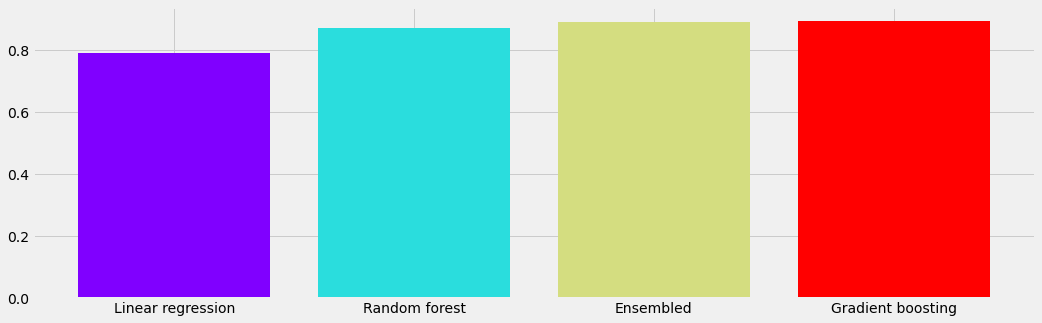

In [37]:
#comparing performances
r2_score=np.array([.79,0.87,0.895,0.892])
labels=np.array(['Linear regression','Random forest','Gradient boosting','Ensembled'])
index=np.argsort(r2_score)
color=plt.cm.rainbow(np.linspace(0,1,4))
plt.subplot(1,1,1)
plt.bar(range(len(index)),r2_score[index],color=color)
plt.xticks(range(0,4),labels[index])
plt.show()
